In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Question 1
The CMS Annual Report 2020/21 states that there were 72 operational medical schemes in 2020, comprising of 21 open schemes and 51 restricted schemes.

## Question 2


In [133]:
A_open = round((3082427/5757864)*100,2)
B_open = round((29774785/52028707)*100,2)
print(f"Private hospitals consist of A-status and B-status private hospitals, so open schemes contribute {A_open} percent to A-status and contribute {B_open} percent to B-status private hospitals.")


Private hospitals consist of A-status and B-status private hospitals, so open schemes contribute 53.53 percent to A-status and contribute 57.23 percent to B-status private hospitals.


## Question 3

In [134]:
df = pd.read_excel('Annexures-to-2020_21.xlsx', sheet_name='15BIGGEST')

In [70]:
df.head(15)

,Name of medical scheme,Average members,Average beneficiaries
0,Bestmed Medical Scheme,96489,202386
1,Bonitas Medical Fund,335425,714989
2,Cape Medical Plan,4226,8783
3,Compcare Wellness Medical Scheme,20791,33348
4,Discovery Health Medical Scheme,1333237,2764994
5,Fedhealth Medical Scheme,76215,148189
6,Genesis Medical Scheme,9209,21056
7,Health Squared Medical Scheme,19063,32610
8,Hosmed Medical Aid Scheme,21125,54253
9,Keyhealth,32747,67709


In [157]:
df = df.sort_values('Average beneficiaries', ascending=False)
chunk = df.iloc[0:15]
chunk.tail()

,Name of medical scheme,Average members,Average beneficiaries
5,Fedhealth Medical Scheme,76215,148189
15,Sizwe Medical Fund,47575,112802
54,Platinum Health,51672,90532
64,Sasolmed,29229,77655
72,Umvuzo Health Medical Scheme,38915,75724


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Discovery Health Medical Scheme'),
  Text(1, 0, 'Government Employees Medical Scheme (GEMS)'),
  Text(2, 0, 'Bonitas Medical Fund'),
  Text(3, 0, 'South African Police Service Medical Scheme (POLMED)'),
  Text(4, 0, 'Momentum Medical Scheme'),
  Text(5, 0, 'Bankmed'),
  Text(6, 0, 'LA-Health Medical Scheme'),
  Text(7, 0, 'Bestmed Medical Scheme'),
  Text(8, 0, 'Medihelp'),
  Text(9, 0, 'Medshield Medical Scheme'),
  Text(10, 0, 'Fedhealth Medical Scheme'),
  Text(11, 0, 'Sizwe Medical Fund'),
  Text(12, 0, 'Platinum Health'),
  Text(13, 0, 'Sasolmed'),
  Text(14, 0, 'Umvuzo Health Medical Scheme')])

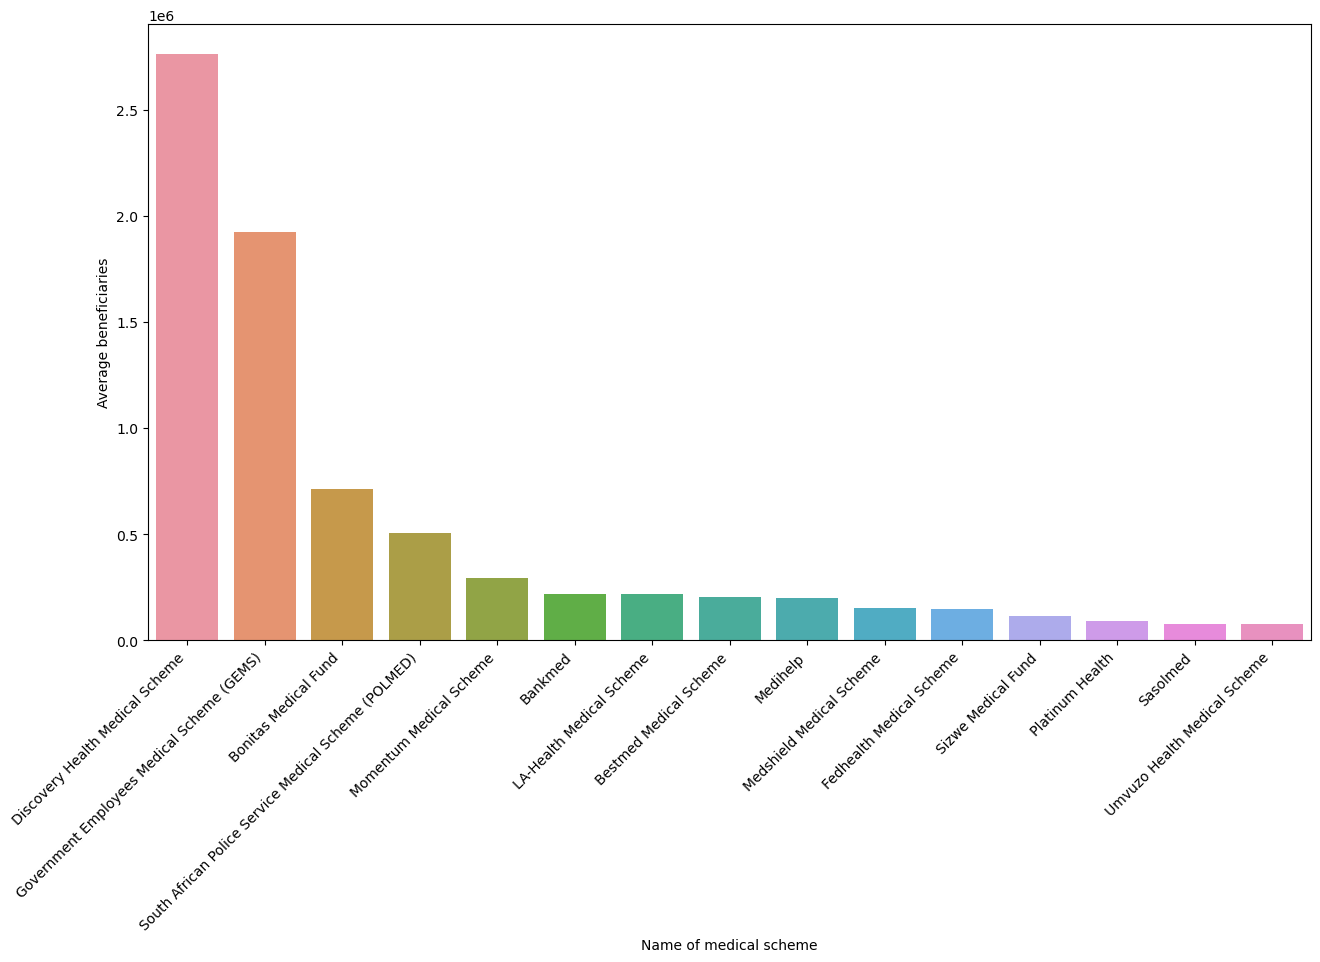

In [136]:
plt.figure(figsize=(15,8))
sns.barplot(x="Name of medical scheme",y="Average beneficiaries",data=chunk)
plt.xticks(rotation=45, ha='right')

## 
In the top 15 medical schemes according to number of beneficiaries, there exists 5 restricted schemes and 10 open schemes. 

## A gamma distribution with the following maximum likelihood estimator for the parameter(s)can be fit to the data:


In [137]:
import numpy as np
from scipy.stats import gamma


data = df['Average beneficiaries'].to_numpy()

shape, loc, scale = gamma.fit(data, floc=1e-6)
#print(shape, loc, scale)

print(f"The maximum likelihood estimator for the shape parameter is:{round(shape,4)}")
print(f"The maximum likelihood estimator for the location parameter is:{round(loc,7)}")
print(f"The maximum likelihood estimator for the scale parameter is:{round(scale,4)}")

The maximum likelihood estimator for the shape parameter is:0.4109
The maximum likelihood estimator for the location parameter is:1e-06
The maximum likelihood estimator for the scale parameter is:285178.5019


In [160]:
#After submission changes

from scipy.stats import gamma
from scipy.optimize import minimize

# Sample data (replace with your own data)
data = df['Average beneficiaries'].to_numpy()

# Define the negative log-likelihood function for the gamma distribution
def neg_log_likelihood(params):
    k, theta = params
    return -np.sum(gamma.logpdf(data, k, scale=theta))

# Initial guesses for k and theta
initial_guess = [2, 1]

# Use SciPy's minimize function to find MLEs
result = minimize(neg_log_likelihood, initial_guess, method='BFGS')

# Extract MLEs
k_hat, theta_hat = result.x

print(f"MLE for shape parameter (k): {k_hat}")
print(f"MLE for scale parameter (θ): {theta_hat}")


MLE for shape parameter (k): -4520798.404982387
MLE for scale parameter (θ): 10005.485543957933


## Question 4 

In [138]:
df2 = pd.read_excel('Annexures-to-2020_21.xlsx', sheet_name='Percentage')
df2['Absolute change'] = abs(df2['Change'])
df2

,Name of medical scheme,Change,Absolute change
0,Bestmed Medical Scheme,2.08,2.08
1,Bonitas Medical Fund,-0.36,0.36
2,Cape Medical Plan,-7.02,7.02
3,Compcare Wellness Medical Scheme,24.56,24.56
4,Discovery Health Medical Scheme,-0.71,0.71
...,...,...,...
73,Tsogo Sun Group Medical Scheme,-2.80,2.80
74,Umvuzo Health Medical Scheme,-1.29,1.29
75,University of Kwa-Zulu Natal Medical Scheme,-0.17,0.17
76,Witbank Coalfields Medical Aid Scheme,1.95,1.95


In [139]:
df2 = (df2.sort_values('Absolute change', ascending=False))
chunk2 = df2.iloc[0:15]
chunk2.head()

,Name of medical scheme,Change,Absolute change
15,Selfmed Medical Scheme,-100.00,100.00
19,Topmed Medical Scheme,-100.00,100.00
3,Compcare Wellness Medical Scheme,24.56,24.56
10,Makoti Medical Scheme,22.03,22.03
37,Grintek Electronics Medical Aid Scheme,-18.02,18.02


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Selfmed Medical Scheme'),
  Text(1, 0, 'Topmed Medical Scheme'),
  Text(2, 0, 'Compcare Wellness Medical Scheme'),
  Text(3, 0, 'Makoti Medical Scheme'),
  Text(4, 0, 'Grintek Electronics Medical Aid Scheme'),
  Text(5, 0, 'Quantum Medical Aid Society'),
  Text(6, 0, 'Transmed Medical Fund'),
  Text(7, 0, 'Health Squared Medical Scheme'),
  Text(8, 0, 'Medimed Medical Scheme'),
  Text(9, 0, 'AECI Medical Aid Society'),
  Text(10, 0, 'Thebemed'),
  Text(11, 0, 'Building & Construction Industry Medical Aid Fund'),
  Text(12, 0, 'Motohealth Care'),
  Text(13, 0, 'LA-Health Medical Scheme'),
  Text(14, 0, 'BMW Employees Medical Aid Society')])

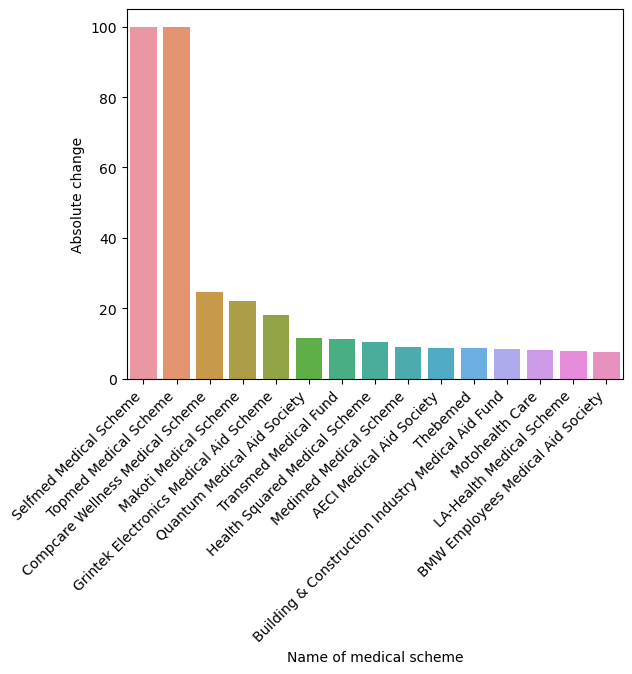

In [140]:
sns.barplot(x="Name of medical scheme",y="Absolute change",data=chunk2)
plt.xticks(rotation=45, ha='right')

## The 100% change might have occured because of the following reasons:
1. As a result of the organisation being closed or liquidated.
2. As a result of mergers or acquisitions.
3. The creation of a new medical scheme/market competition.
4. Changes in age and a need for day-to-day care.
5. Affordability and economic factors.

## Question 5

In [141]:
#TRANSPOSING THE EXCEL DATA WOULD HELP


#5.1.Open schemes 
df3 = pd.read_excel('Annexures-to-2020_21.xlsx', sheet_name='Options_open')

#largest options
data = {
"Bestmed Medical Scheme": ['Beat 1', 'Beat 2', 'Beat 3', 'Beat 4', 'Pace 1', 'Pace 2','Pace 3', 'Pace 4', 'Pulse 1', 'Pulse 2'],
"Bonitas Medical Fund": ['Boncap','BonClassic', 'BonComplete', 'BonComprehensive', 'BonEssential','BonFit Select', 'Bonsave', 'Hospital Standard', 'Primary','Standard'],
"Cape Medical Plan": ['Healthpact Premium', 'Healthpact Select','Healthpact Silver'],
"Compcare Wellness Medical Scheme": ['Dynamix', 'MedX', 'Mumed', 'Networx','Pinnacle', 'Selfnet', 'Selfsure', 'Symmetry', 'Unisave', 'Other*'],
"Discovery Health Medical Scheme": [ 'Classic Comprehensive', 'Classic Core', 'Classic Priority','Classic Saver', 'Classic Smart', 'Classic Smart Comprehensive','Coastal Core', 'Coastal Saver', 'Essential Comprehensive','Essential Core', 'Essential Priority', 'Essential Saver','Essential Smart', 'Executive', 'KeyCare Core', 'KeyCare Plus','KeyCare Start'],
"Fedhealth Medical Scheme": ['Flexi Fed 1', 'Flexi Fed 2', 'Flexi Fed 3','Flexi Fed 4', 'Maxima Exec', 'Maxima Plus', 'My Fed'],
"Genesis Medical Scheme": ['Private','Private Choice', 'Private Comprehensive', 'Private Plus'],
"Health Squared Medical Scheme": ['Advance', 'Aspire', 'Cobalt', 'Flex', 'Flex Plus', 'Foundation','Millennium', 'Optimum', 'Rise', 'Ultimate'],
"Hosmed Medical Aid Scheme": ['Access', 'Essential','Plus', 'Value'],
"Keyhealth": ['Equilibrium', 'Essence', 'Gold', 'Origin','Platinum', 'Silver'],
"Makoti Medical Scheme": ['Makoti Comprehensive', 'Makoti Primary'],
"Medihelp": ['Elite', 'Necesse', 'Prime 1', 'Prime 2', 'Prime 3', 'Unify'],
"Medimed Medical Scheme": ['Alpha', 'Essential Option', 'Medisave - Max','Medisave - Standard'],
"Medshield Medical Scheme": ['MediBonus', 'MediCore', 'MediPhila','MediPlus Prime', 'MediSaver', 'MediValue Prime', 'Premium Plus'],
"Momentum Medical Scheme": ['Custom', 'Evolve', 'Extender', 'Incentive', 'Ingwe', 'Summit'],
"Sizwe Medical Fund": ['Copper Core Plan', 'Gold Ascend Plan', 'Hospital Care','Platinum Enhance Plan', 'Titanium Executive Plan'],
"Suremed Health": ['Challenger','Explorer', 'Navigator', 'Shuttle'],
"Thebemed": ['Energy', 'Fantasy','Universal']
}

scheme_counts = {}

for scheme, options in data.items():
    scheme_counts[scheme] = len(options)

#scheme with largest number of options
max_scheme = max(scheme_counts, key=scheme_counts.get)
max_options = scheme_counts[max_scheme]
print(f"The open medical scheme with the largest number of options is '{max_scheme}' with {max_options} options.")

#scheme with least number options
min_scheme = min(scheme_counts, key=scheme_counts.get)
min_options = scheme_counts[min_scheme]
print(f"The open medical scheme with the smallest number of options is '{min_scheme}' with {min_options} options.")

#Average number of benefit options
avg = sum(scheme_counts.values())/len(scheme_counts)
print(f"For the open medical schemes, the average number of benefit options is '{round(avg,0)}' .")



The open medical scheme with the largest number of options is 'Discovery Health Medical Scheme' with 17 options.
The open medical scheme with the smallest number of options is 'Makoti Medical Scheme' with 2 options.
For the open medical schemes, the average number of benefit options is '7.0' .


In [162]:
#TRYING TO RESHAPE THE DATA, TRANSPOSE THE BENEFIT OPTION COLUMN
pivoted = df4.pivot(index='Name of medical scheme', columns='Parent Benefit Option ID', values='Benefit option name')\
            .reset_index()
pivoted.columns.name=None
print(pivoted)

ValueError: Index contains duplicate entries, cannot reshape

In [154]:
#5.2Restricted schemes
df4 = pd.read_excel('Annexures-to-2020_21.xlsx', sheet_name='Options_restricted')

data = {
"AECI Medical Aid Society": ['Comprehensive', 'Value'],
"Alliance-Midmed Medical Scheme": ['Alliance-Midmed Medical Scheme'],
"Anglo Medical Scheme": ['Managed Care Plan', 'Standard Care Plan', 'Value Care Plan'],
"Anglovaal Group Medical Scheme": ['Anglovaal Group Medical Scheme'],
"Bankmed": ['Bankmed Basic', 'Bankmed Comprehensive', 'Bankmed Core Saver', 'Bankmed Essential Plan', 'Bankmed Plus', 'Bankmed Traditional'],
" Barloworld Medical Scheme": ['Barloworld Medical Scheme'],
"BMW Employees Medical Aid Society": ['BMW Option 119'],
"BP Medical Aid Society": ['BPSA Medical Society'],
"Building & Construction Industry Medical Aid Fund": ['Basic option'],
"Chartered Accountants (SA) Medical Aid Fund (CAMAF)": ['Alliance Benefit Option', 'Double Plus Benefit Option', 'Essential Plus Benefit Option', 'First Choice Benefit Option', 'Network Choice Benefit Option', 'Vital Benefit Option'],
"De Beers Benefit Society": ['De Beers Benefit Society'],
" Engen Medical Benefit Fund": ['Engen Medical Benefit Fund'],
"Fishing Industry Medical Scheme (Fishmed)": ['Primary', 'Standard'],
"Foodmed Medical Scheme": ['Food Workers Medical Benefit Fund'],
"Glencore Medical Scheme": ['107'],
"Golden Arrow Employees' Medical Benefit Fund": ['Advance', 'Primary', 'Standard'],
"Government Employees Medical Scheme (GEMS)": ['Beryl', 'Emerald', 'Onyx', 'Ruby', 'Tanzanite One'],
"Grintek Electronics Medical Aid Scheme": ['Option 1'],
"Horizon Medical Scheme": ['Hospital Plus Savings Plan', 'Hospital Core Plan', 'Hospital Plus Network Plan'],
"Impala Medical Plan": ['Impala Medical Plan'],
"Imperial and Motus Medical Aid": ['Imperialmed Health Plan', 'Imperialmed Budget Plan'],
"LA-Health Medical Scheme": ['LA Active', 'LA Comprehensive', 'LA Core', 'LA Focus', 'LA Keyplus'],
"Libcare Medical Scheme": ['Libcare'],
"Lonmin Medical Scheme": ['Lonmin Medical Scheme Benefit Plan'],
"Malcor Medical Scheme": ['Plan A', 'Plan B', 'Plan C', 'Plan D'],
"Massmart Health Plan": ['Choice Option', 'Essential Option', 'Network Option'],
" MBMed Medical Aid Fund": ['MBMed'],
" Medipos Medical Scheme": ['Option A', 'Option B', 'Option C'],
"Motohealth Care": ['Classic', 'Custom', 'Essential', 'Hospicare', 'Optimum'],
" Naspers Medical Fund": ['M-Med Option'],
"Nedgroup Medical Aid Scheme": ['Comprehensive Plan', 'Hospital Network Plan', 'Platinum', 'Savings', 'Traditional'],
"Netcare Medical Scheme": ['Netcare Savings Option'],
"Old Mutual Staff Medical Aid Fund": ['Hospital Plan', 'Network Plan', 'Savings Plan', 'Traditional Plan', 'Traditional Plus Plan'],
" Parmed Medical Aid Scheme": ['Plan - 007'],
"PG Group Medical Scheme": ['PG Group Medical Scheme'],
"Pick n Pay Medical Scheme": ['Plus option', 'Primary option'],
"Platinum Health": ['PlatCap', 'PlatComprehensive', 'PlatFreedom'],
"Profmed": ['Pro Active', 'Pro Active Plus', 'Pro Pinnacle', 'Pro Secure', 'Pro Secure Plus'],
" Quantum Medical Aid Society": ['Essential Comprehensive', 'Essential Saver', 'Keycare Plus'],
"Rand Water Medical Scheme": ['Option A', 'Option B Plus'],
"Remedi Medical Aid Scheme": ['Classic', 'Comprehensive', 'Standard'],
"Retail Medical Scheme": ['Essential Option', 'Essential Plus Option'],
" Rhodes University Medical Scheme": ['RUMED'],
"South African Breweries Medical Aid Scheme (SABMAS)": ['Comprehensive option', 'Essential Option'],
"SABC Medical Aid Scheme": ['SABC Plan 009'],
"SAMWUMed": ['Option A', 'Option B'],
"Sasolmed": ['Sasolmed'],
"Sedmed": ['Sedmed'],
"Sisonke Health Medical Scheme": ['Pride Plan', 'Heritage Plan'],
"South African Police Service Medical Scheme (POLMED)": ['Aquarium', 'Marine'],
"TFG Medical Aid Scheme": ['TFG Health Plan', 'TFG Health Plus'],
"Tiger Brands Medical Scheme": ['Primary Plus Option', 'Option 1'],
"Transmed Medical Fund": ['Guardian', 'Prime Plan', 'Link Plan', 'Select Plan'],
"Tsogo Sun Group Medical Scheme": ['Classic Comprehensive', 'Classic Saver'],
"Umvuzo Health Medical Scheme": ['Activator', 'Standard', 'Supreme', 'Ultra Affordable', 'Extreme'],
"University of Kwa-Zulu Natal Medical Scheme": ['Savings Plus Plan'],
"Witbank Coalfields Medical Aid Scheme": ['Comprehensive option', 'Midmas option', 'Ntsika option', 'Yebomed'],
"Wooltru Healthcare Fund": ['Comprehensive Option', 'Network Option', 'Saver Option']
}


scheme_counts = {}
for scheme, options in data.items():
    scheme_counts[scheme] = len(options)

# scheme with the maximum number of benefit options.
max_scheme = max(scheme_counts, key=scheme_counts.get)
max_options = scheme_counts[max_scheme]
print(f"The restricted medical scheme with the largest number of options is '{max_scheme}' with {max_options} options.")

#scheme with least benefit options/ GET CODE THAT WILL RETURN ALL THE SCHEMES WITH 1 OPTION
min_scheme = min(scheme_counts, key=scheme_counts.get)
min_options = scheme_counts[min_scheme]
print(f"The restricted medical scheme with the smallest number of options is '{min_scheme}' with {min_options} option.")


#Average number of benefit options
avg = sum(scheme_counts.values())/len(scheme_counts)
print(f"For the restricted medical schemes, the average number of benefit options is '{round(avg,0)}' .")



The restricted medical scheme with the largest number of options is 'Bankmed' with 6 options.
The restricted medical scheme with the smallest number of options is 'Alliance-Midmed Medical Scheme' with 1 option.
For the restricted medical schemes, the average number of benefit options is '2.0' .


## Question 6

In [143]:
df5 = pd.read_excel('Annexures-to-2020_21.xlsx', sheet_name='Seasonality').dropna()

In [144]:
#Run from top
numeric_columns = df5.columns[2:-2]
df5["max_values"] = df5[numeric_columns].max(axis=1)
df5["min_values"] = df5[numeric_columns].min(axis=1)
df5["Volatility"] = abs(df5[numeric_columns].max(axis=1) - df5[numeric_columns].min(axis=1))
df5

,Name of medical scheme,Group,January risk claims ratio,February risk claims ratio,March risk claims ratio,April risk claims ratio,May risk claims ratio,June risk claims ratio,July risk claims ratio,August risk claims ratio,September risk claims ratio,October risk claims ratio,November risk claims ratio,December risk claims ratio,Year risk claims ratio,Average beneficiaries,max_values,min_values,Volatility
1,Bestmed Medical Scheme,Open,82.48,85.76,89.34,53.64,61.53,62.37,64.25,92.93,79.4,90.67,82.4,75.58,76.71,714989,92.93,53.64,39.29
2,Cape Medical Plan,Open,85.16,98.59,109.5,55.03,70.58,78.09,71.72,61.21,96.62,106.6,87.87,127.42,87.26,8783,127.42,55.03,72.39
3,Compcare Wellness Medical Scheme,Open,68.07,100.65,91.85,87.9,73.41,72.45,59.63,81.43,79.51,84.56,93.56,89.02,81.75,33348,100.65,59.63,41.02
4,Discovery Health Medical Scheme,Open,83.52,84.38,87.39,40.63,67.58,68.28,83.17,59.92,84.12,87.73,92.62,75.28,76.18,2764994,92.62,40.63,51.99
5,Fedhealth Medical Scheme,Open,74.23,81.14,115.82,74,80.62,71.8,73.05,92.66,90.57,100.33,79.13,78.69,84.29,148189,115.82,71.80,44.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Tsogo Sun Group Medical Scheme,Restricted,81.18,70.74,88.62,27.5,71.09,-394.35,7094.26,11773.12,93.53,82.32,68.14,131.49,108.3,11093,11773.12,-394.35,12167.47
72,Umvuzo Health Medical Scheme,Restricted,75.04,80.82,81.72,60.96,65.9,73.11,81.04,76.69,95.83,84.56,79.31,86.81,78.41,75724,95.83,60.96,34.87
73,University of Kwa-Zulu Natal Medical Scheme,Restricted,95.25,101.36,84.81,38,72.27,69.84,78.74,105.93,70.9,81.36,80.13,91.29,80.83,6848,105.93,38.00,67.93
74,Witbank Coalfields Medical Aid Scheme,Restricted,73.01,103.31,79.77,98.57,73.06,66.67,67.84,82.76,100.26,102.81,76.39,56.47,81.68,24646,103.31,56.47,46.84


In [145]:

#new dataframe for only schemes and volatility values
vol_df = pd.DataFrame({"Name of medical scheme":df5["Name of medical scheme"],"Volatility of claims":df5["Volatility"]})
data = vol_df.set_index('Name of medical scheme').T.to_dict('list')  #converting the df into a dictionary

num_scheme = {}
for scheme, vol in data.items():
    num_scheme[scheme] =max(vol)
    
#6.1.   
#maximum volatility.
max_scheme = max(num_scheme, key=num_scheme.get)
max_options = num_scheme[max_scheme]
print(f"The scheme that experienced the largest volatility of claims in 2020 is {max_scheme} with {round(max_options,2)} .")

#6.2.
#minimum volatility
min_scheme = min(num_scheme, key=num_scheme.get)
min_options = num_scheme[min_scheme]
print(f"The scheme that experienced the lowest volatility in 2020 is {min_scheme} with {round(min_options,2)} .")



The scheme that experienced the largest volatility of claims in 2020 is Remedi Medical Aid Scheme with 80113.83 .
The scheme that experienced the lowest volatility in 2020 is Fishing Industry Medical Scheme (Fishmed) with 3.49 .


In [152]:
#Its best to have separated these
num_scheme = {}
for scheme, vol in data.items():
    num_scheme[scheme] =min(vol)
    
#minimum volatility
min_scheme = min(num_scheme, key=num_scheme.get)
min_options = num_scheme[min_scheme]
print(f"The scheme that experienced the lowest volatility in 2020 is {min_scheme} with {round(min_options,2)} .")


The scheme that experienced the lowest volatility in 2020 is Fishing Industry Medical Scheme (Fishmed) with 3.49 .


## 6.3. Boxplots

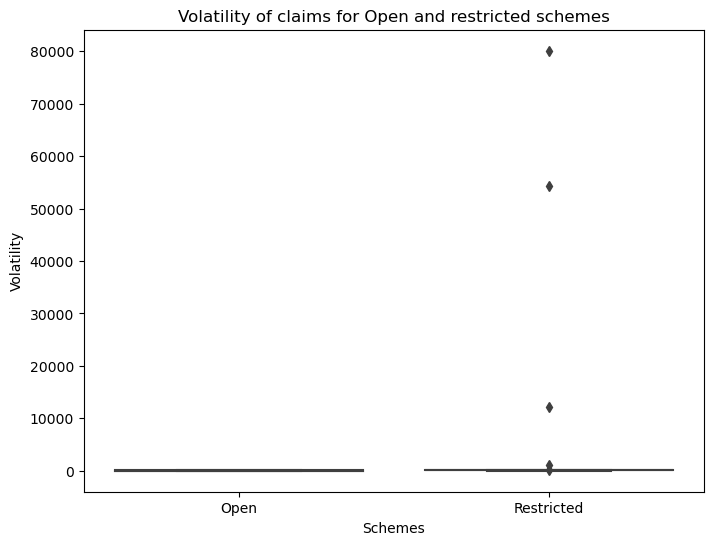

In [150]:

#6.3.
plt.figure(figsize=(8, 6)) 
sns.boxplot(x='Group', y='Volatility', data=df5)
plt.title('Volatility of claims for Open and restricted schemes')
plt.xlabel('Schemes')
plt.ylabel('Volatility')

plt.show()


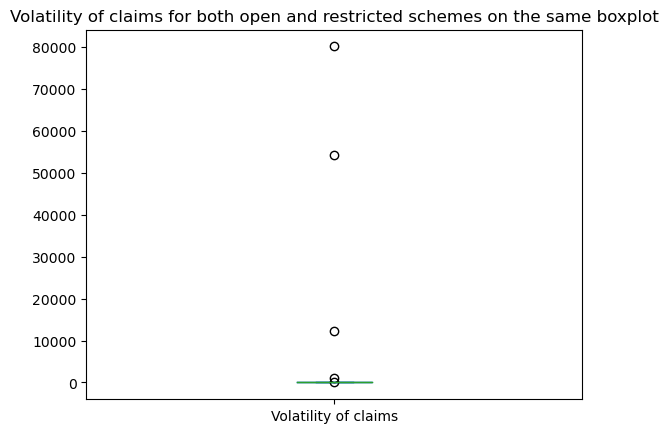

     Volatility of claims
min                  3.49
25%                 42.98
50%                 57.97
75%                 75.74
max              80113.83


In [131]:
#6.3
#Five number summary
Five_num_sum = vol_df.describe().loc[['min', '25%', '50%', '75%', 'max']]
vol_df['Volatility of claims'].plot(kind='box', title='Volatility of claims for both open and restricted schemes on the same boxplot')
plt.show()
print(Five_num_sum)

## Interpretation of the boxplot:
1.Seperate boxes:The boxplot for the restricted schemes has a bigger spread than the one for open schemes. The means of the open and restricted schemes are not significantly different.

2.Combined boxes:The boxplot has a large spread and variability, minimum value of 3.49, q1 of 42.98,q3 of 75.74, and a median of 57.97.There exists outliers in the data.

## 6.4.Hypothesis test:
## Null Hypothesis H0: There is no statistically significant difference between the mean volatilities
## Alternative Hypothesis H1: There is statistically significant difference between the mean volatilities

In [16]:
#Grouping the schemes
Small = df5[df5["Average beneficiaries"]<10000]["Volatility"]
Medium = df5[(df5["Average beneficiaries"]>10000)&(df5["Average beneficiaries"]<100000)]["Volatility"]
Large = df5[df5["Average beneficiaries"]>100000]["Volatility"]


In [130]:
import scipy.stats as stats

#6.4.a.
#Small and Medium schemes
t_value, p_value = stats.ttest_ind(Small, Medium)
print("t-value:", t_value)
print("p-value:", p_value)

alpha = 0.05 

if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference between the mean volatilities.")
else:
    print("Do not reject the null hypothesis. There is no statistically significant difference between the mean volatilities.")


t-value: -0.018837038129127306
p-value: 0.9850315969251215
Do not reject the null hypothesis. There is no statistically significant difference between the mean volatility of small and medium schemes.


In [20]:
#6.4.b.
#Medium and Large schemes
t_value, p_value = stats.ttest_ind(Medium,Large)
print("t-value:", t_value)
print("p-value:", p_value)

alpha = 0.05 

if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference between the mean volatilities.")
else:
    print("Do not reject the null hypothesis. There is no statistically significant difference between the mean volatilities.")


t-value: 0.6053906162521162
p-value: 0.5477133240649478
Do not reject the null hypothesis. There is no statistically significant difference between the mean volatility of small and medium schemes.


In [153]:
#6.4.c.
#Small and Large schemes
t_value, p_value = stats.ttest_ind(Large,Small)
print("t-value:", t_value)
print("p-value:", p_value)

alpha = 0.05 

if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference between the mean volatilities.")
else:
    print("Do not reject the null hypothesis. There is no statistically significant difference between the mean volatilities.")



t-value: -0.6792844602083392
p-value: 0.5016947171241402
Do not reject the null hypothesis. There is no statistically significant difference between the mean volatilities.
